In [1]:
from Project_functions import *

# Load the Data

In [11]:
data = pd.read_csv('/Users/thalesoliveira/Documents/CBPF/ML_course/Final_Project/covid-19-data-master/public/data/latest/owid-covid-latest.csv')
data = data.fillna(0)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    233 non-null    object 
 1   continent                                   233 non-null    object 
 2   location                                    233 non-null    object 
 3   last_updated_date                           233 non-null    object 
 4   total_cases                                 233 non-null    float64
 5   new_cases                                   233 non-null    float64
 6   new_cases_smoothed                          233 non-null    float64
 7   total_deaths                                233 non-null    float64
 8   new_deaths                                  233 non-null    float64
 9   new_deaths_smoothed                         233 non-null    float64
 10  total_cases_pe

# Useful functions

# Fit: Total_cases_per_million x total_deaths_per_million

ang. coef.:  [[0.00541943]]
intercept:  [425.3696371]


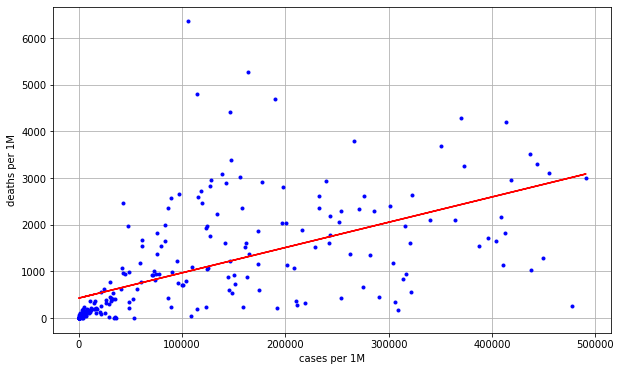

In [10]:
data_cut = make_low_pd_cut(data,'total_cases_per_million',None,500e3)
plot_fit_scatter(data_cut,'total_cases_per_million','total_deaths_per_million','cases per 1M', 'deaths per 1M')

# Brasil:

In [23]:
data.iloc[29]['total_deaths_per_million']

3088.786

In [24]:
data.iloc[29]['total_cases_per_million']

140514.092

In [25]:
pred = 0.00541943*data.iloc[29]['total_cases_per_million'] + 425.3696371

In [26]:
pred

1186.87592270756

In [30]:
mean_test = np.mean(data['total_tests_per_thousand'])
mean_test

1113.9258927038627

In [46]:
data.iloc[29]['human_development_index']
#331.427

0.765

In [49]:
def ID_high_events(data,metric,value):
    for i in range(data.shape[0]): # loop over all countries
        if data[metric][i] > value: 
            print(i,data['location'][i], data[metric][i], data['total_tests_per_thousand'][i])

In [51]:
ID_high_events(data,'total_deaths_per_million',3000)

27 Bosnia and Herzegovina 4819.426 0.0
29 Brazil 3088.786 0.0
32 Bulgaria 5314.895 1395.937
50 Croatia 3833.247 1149.746
54 Czechia 3712.602 5020.941
78 Georgia 4212.552 3417.001
94 Hungary 4738.035 1108.197
116 Latvia 3035.458 3760.694
122 Lithuania 3322.104 3157.081
141 Montenegro 4308.567 0.0
155 North Macedonia 4433.751 943.252
165 Peru 6366.898 861.416
167 Poland 3055.057 952.239
171 Romania 3405.885 0.0
180 San Marino 3351.955 0.0
189 Slovakia 3575.158 9289.373
190 Slovenia 3135.098 2327.286


In [ ]:
def ID_high_events(data,metric,value):
    for i in range(data.shape[0]): # loop over all countries
        if data[metric][i] > value: 
            print(i,data['location'][i],data[metric][i])
            

# Fit: HDI x vaccination ratio

/Users/thalesoliveira/Documents/CBPF/ML_course/PH482_582_Sp22/Projeto/Project_functions.py:147: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data = new_data[data[metric2] > value]


ang. coef.:  [[1.42632556]]
intercept:  [-0.54199757]


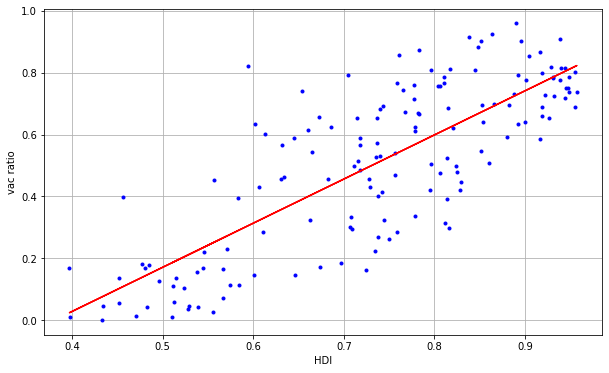

In [4]:
data_HDI_vac = make_high_pd_cut(data,'human_development_index','people_fully_vaccinated',0.0)
plot_one_relative_fit_scatter(data_HDI_vac,'human_development_index','people_fully_vaccinated','HDI', 'vac ratio')

# Fit: GDP x vaccination ratio

/Users/thalesoliveira/Documents/CBPF/ML_course/PH482_582_Sp22/Projeto/Project_functions.py:147: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data = new_data[data[metric2] > value]


ang. coef.:  [[8.80787097e-06]]
intercept:  [0.34010446]


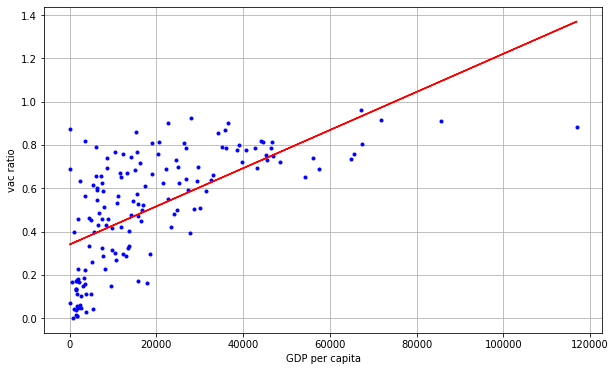

In [5]:
data_GDP_vac = make_high_pd_cut(data,'gdp_per_capita','people_fully_vaccinated',0.0)
plot_one_relative_fit_scatter(data_HDI_vac,'gdp_per_capita','people_fully_vaccinated','GDP per capita', 'vac ratio')

# Fit: GDP x total_tests_per_thousand

/Users/thalesoliveira/Documents/CBPF/ML_course/PH482_582_Sp22/Projeto/Project_functions.py:147: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data = new_data[data[metric2] > value]


ang. coef.:  [[0.07771224]]
intercept:  [233.6588818]


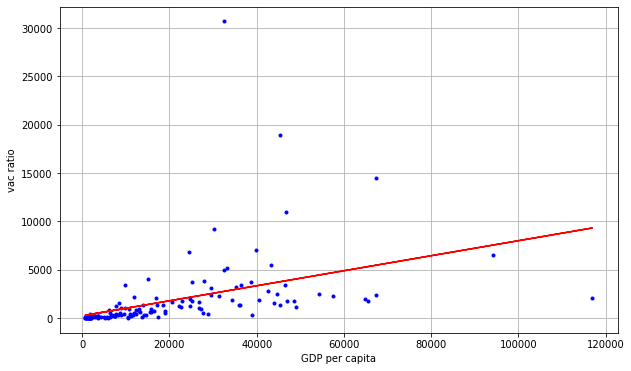

In [8]:
data_GDP_test = make_high_pd_cut(data,'gdp_per_capita','total_tests_per_thousand',0.0)
plot_fit_scatter(data_GDP_test,'gdp_per_capita','total_tests_per_thousand','GDP per capita', 'vac ratio')

In [ ]:
plot_scatter(data, 'median_age','total_deaths_per_million','median age','Deaths/1M')     

# Fit: median age x deaths per million

/Users/thalesoliveira/Documents/CBPF/ML_course/PH482_582_Sp22/Projeto/Project_functions.py:147: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data = data[data[metric1] < value]


ang. coef.:  [[83.26804329]]
intercept:  [-1389.72862716]


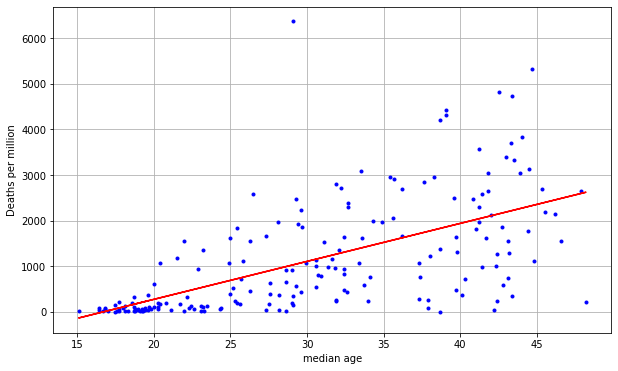

In [12]:
data_age_dth = make_high_pd_cut(data,'median_age','total_deaths_per_million',0.0)
plot_fit_scatter(data_age_dth,'median_age','total_deaths_per_million', 'median age', 'Deaths per million')

# Fit: life expectancy x deaths per million

/Users/thalesoliveira/Documents/CBPF/ML_course/PH482_582_Sp22/Projeto/Project_functions.py:147: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data = data[data[metric1] < value]


ang. coef.:  [[73.17378608]]
intercept:  [-4226.73246729]


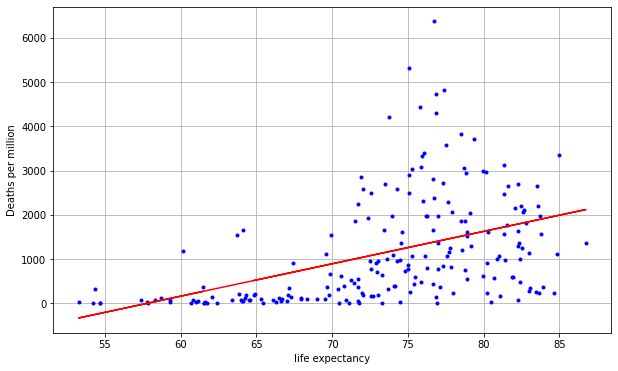

In [13]:
data_life_dth = make_high_pd_cut(data,'life_expectancy','total_deaths_per_million',0.0)
plot_fit_scatter(data_life_dth,'life_expectancy','total_deaths_per_million', 'life expectancy', 'Deaths per million')

# Fit: diabetes prevalence x deaths per million

/Users/thalesoliveira/Documents/CBPF/ML_course/PH482_582_Sp22/Projeto/Project_functions.py:147: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data = data[data[metric1] < value]


ang. coef.:  [[11.16867719]]
intercept:  [1070.0469739]


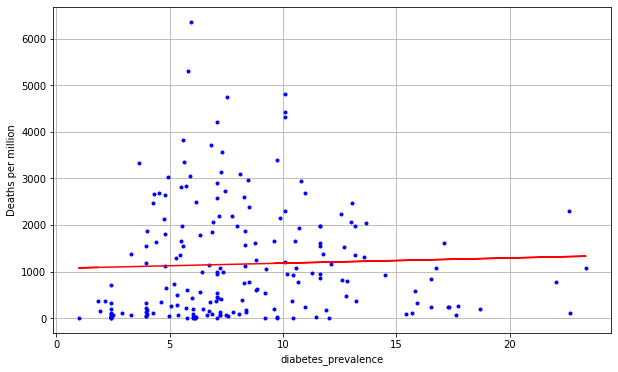

In [18]:
data_dia_dth = make_high_pd_cut(data,'diabetes_prevalence','total_deaths_per_million',0.0)
plot_fit_scatter(data_dia_dth,'diabetes_prevalence','total_deaths_per_million', 'diabetes_prevalence', 'Deaths per million')

# Fit: population density x deaths per million

/Users/thalesoliveira/Documents/CBPF/ML_course/PH482_582_Sp22/Projeto/Project_functions.py:139: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ang. coef.:  [[0.19353733]]
intercept:  [695.91772765]


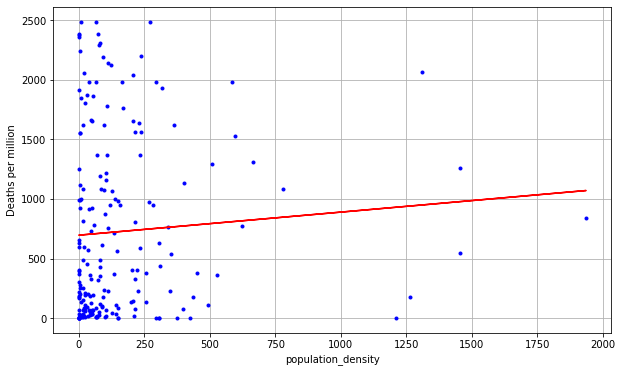

In [56]:
data_car_dth = make_low_pd_cut(data,'population_density','total_deaths_per_million',2500.0)
plot_fit_scatter(data_car_dth,'population_density','total_deaths_per_million', 'population_density', 'Deaths per million')

/Users/thalesoliveira/Documents/CBPF/ML_course/PH482_582_Sp22/Projeto/Project_functions.py:147: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data = data[data[metric1] < value]


ang. coef.:  [[16.63293248]]
intercept:  [-158.25210434]


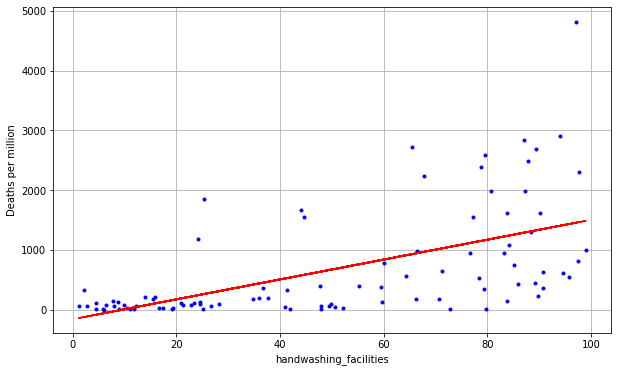

In [61]:

data_car_dth = make_high_pd_cut(data,'handwashing_facilities','total_deaths_per_million',0.0)
plot_fit_scatter(data_car_dth,'handwashing_facilities','total_deaths_per_million', 'handwashing_facilities', 'Deaths per million')